In [4]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    if platform.system() == 'windows':
        # windows의 경우
        font_name = font_manager.FomntProperties(fname="c:/Windows/Font")
        rc('font', family = font_name)
    else:
        # mac의 경우
        rc('font', family = 'AppleGothic')
except :
    pass

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# pip install geopandas

In [5]:
import geopandas as gpd
gpd.__version__ 

'0.7.0'

In [8]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)
cities.tail(3)

,name,geometry
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


In [9]:
# conda install -c conda-forge descartes

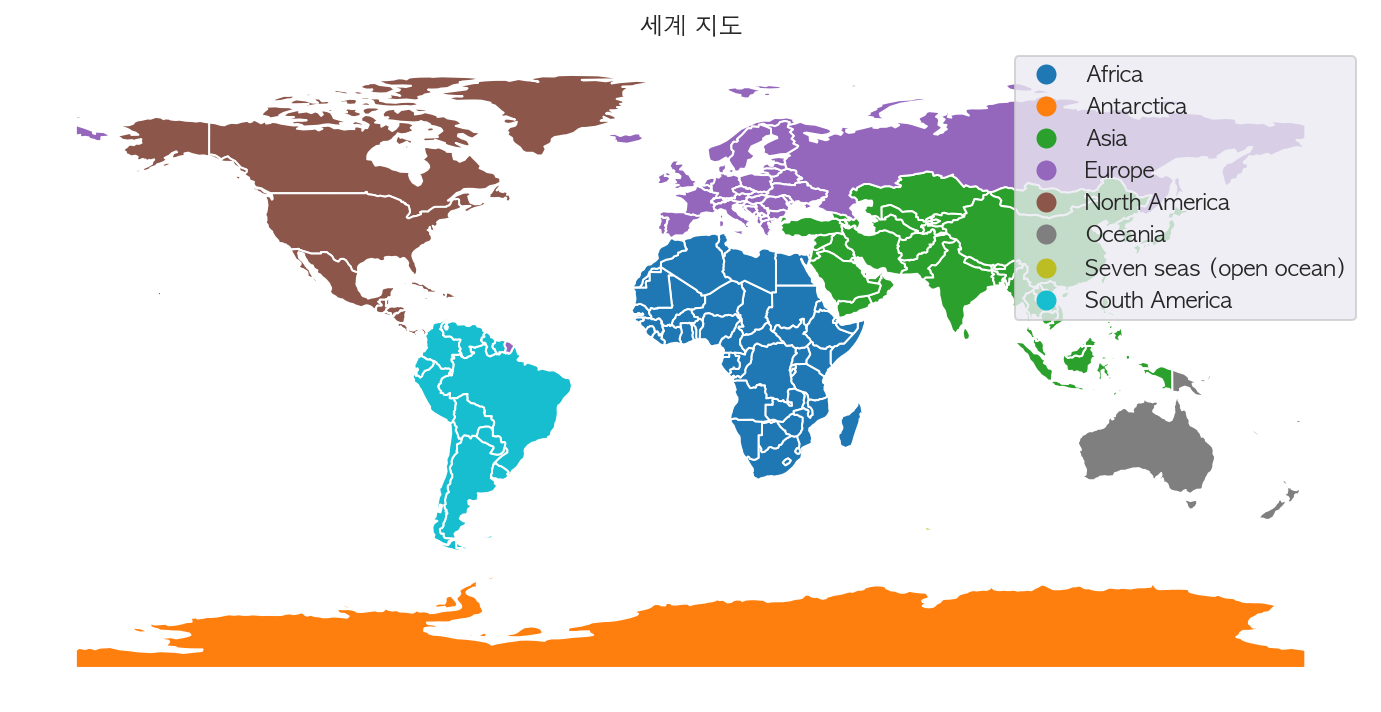

In [10]:
countries.plot(column="continent", legend=True, categorical=True, figsize=(16,6))
plt.title("세계 지도")
plt.axis(False)
plt.show()

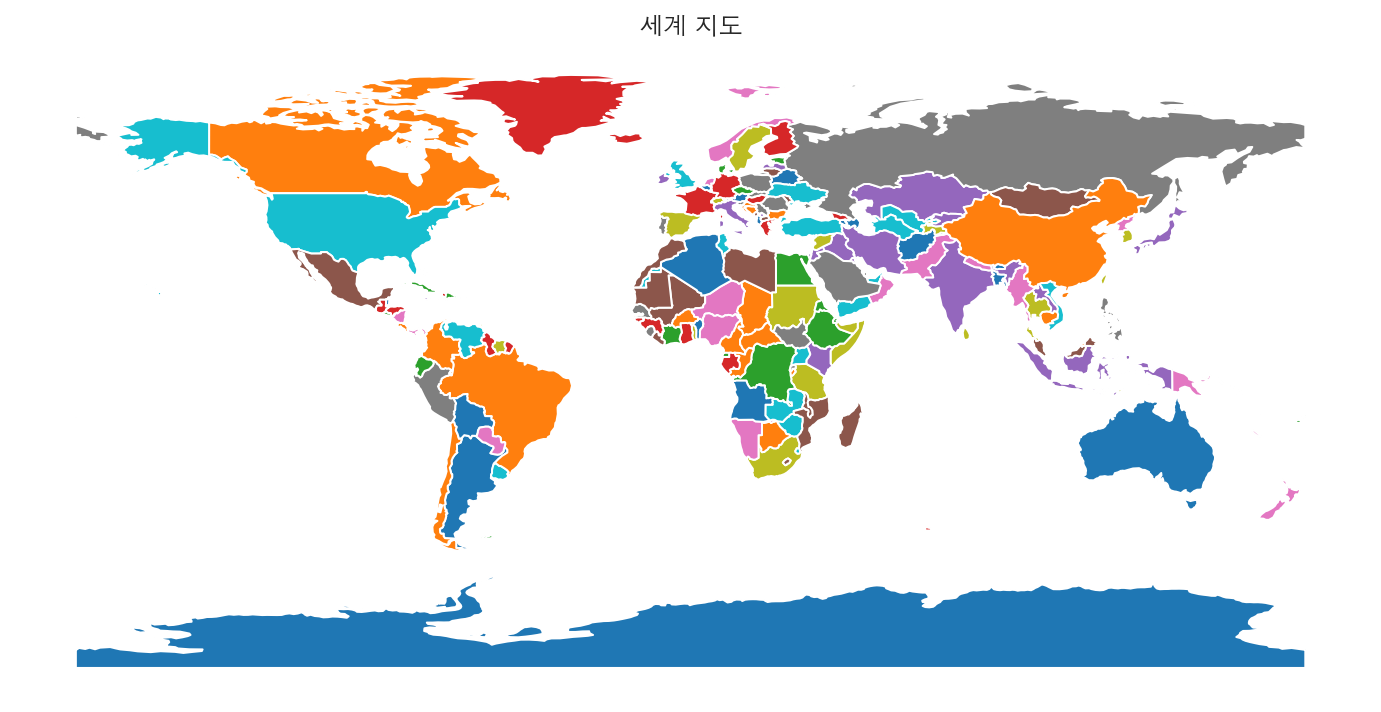

In [11]:
ax = countries.plot(column="name", legend=False, categorical=True, figsize=(16,6))
ax.set_title("세계 지도")
ax.set_axis_off()
plt.show()

In [12]:
# pip install mapclassify

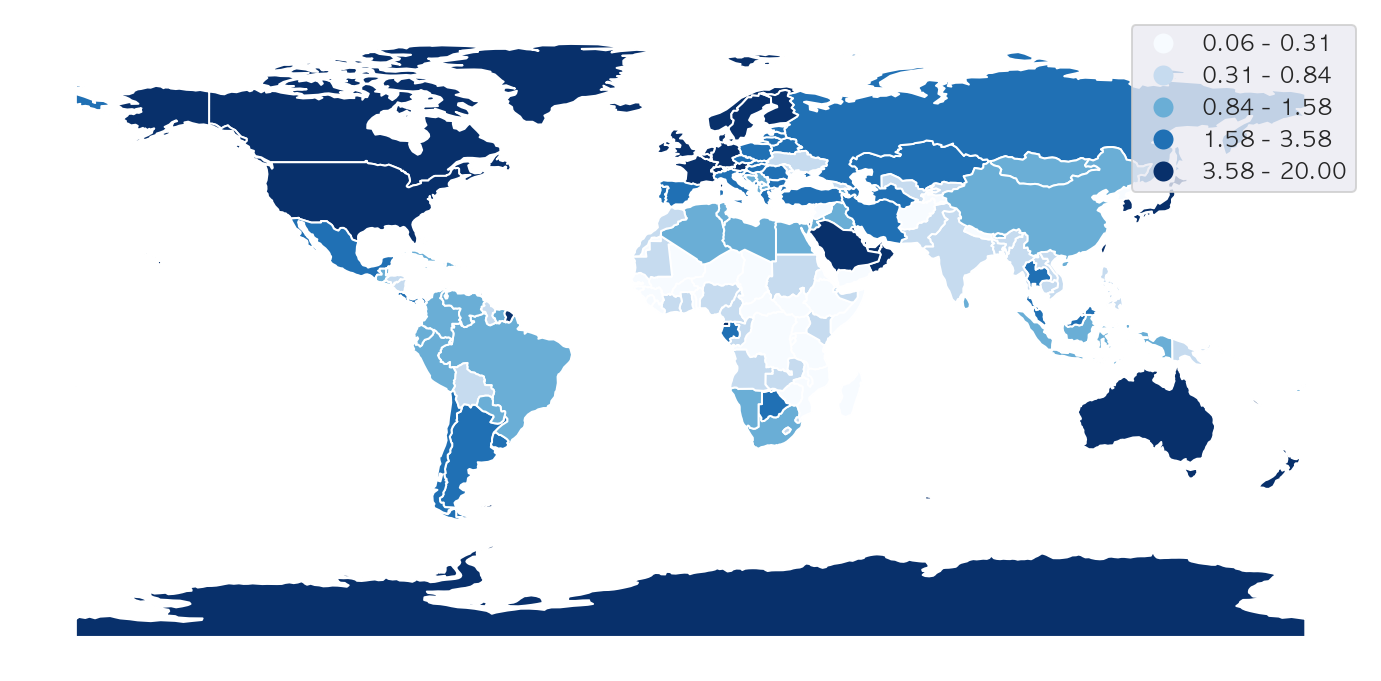

In [13]:
# 1인당 GDP 연산
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5, figsize=(16,6))
plt.axis(False)
ax.set_title("세계 국가의 1인당 GDP")
plt.show()

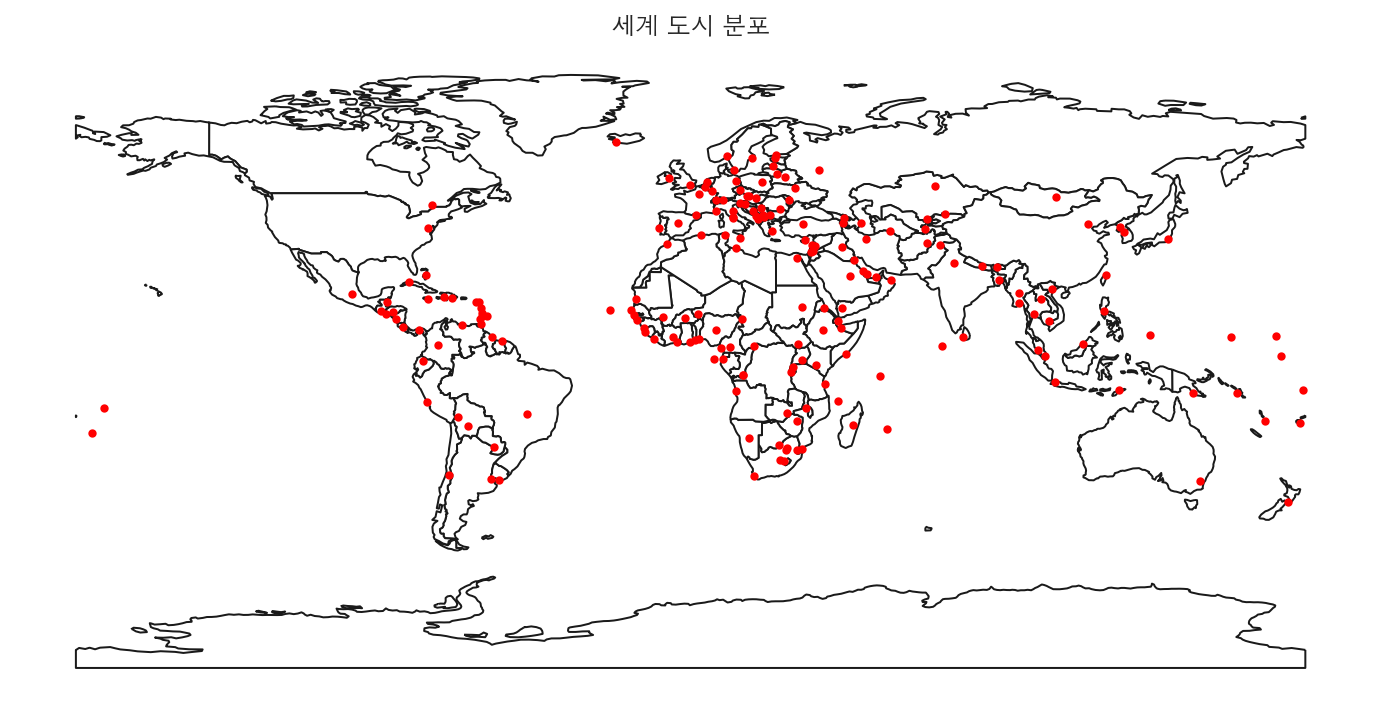

In [14]:
base = countries.plot(color='white', edgecolor="k", figsize=(16,6))
cities.plot(ax=base, marker='o', color='red', markersize=10)
plt.axis(False)
plt.title("세계 도시 분포")
plt.show()

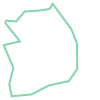

In [16]:
korea_border = countries[countries.name == "South Korea"].geometry
korea_border.boundary.squeeze()

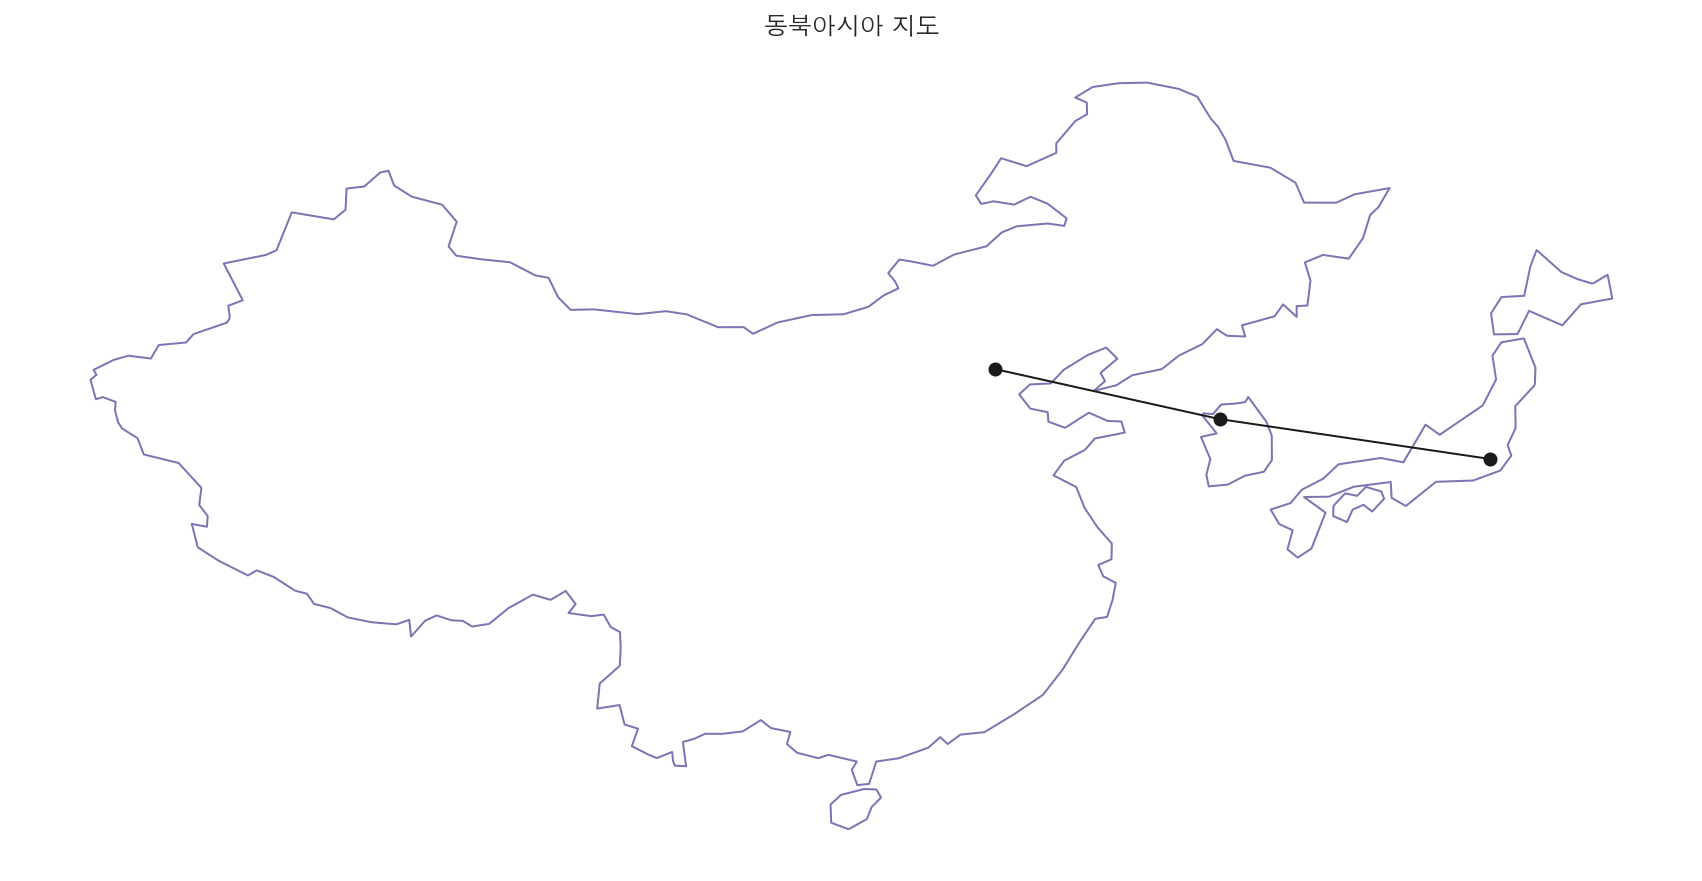

In [17]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(15, 15), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gpd.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor='k', lw=1)
ax.set_title("동북아시아 지도")
ax.set_axis_off()
plt.show()

In [23]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries['name'] == 'China', 'geometry'].squeeze()
japan = countries.loc[countries['name'] == 'Japan', 'geometry'].squeeze()

In [24]:
seoul.within(korea)

True

In [25]:
korea.contains(seoul)

True

In [26]:
china.intersects(korea)

False

In [27]:
line.crosses(korea)

True

In [29]:
countries[countries.crosses(line)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",3.900313


In [28]:
seoul.distance(beijing)

10.871264032732043

In [30]:
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,142257519,Europe,Russia,RUS,3745000.0,"MULTIPOLYGON (((178.725 71.099, 180.000 71.516...",2.632550
95,25248140,Asia,North Korea,PRK,40000.0,"MULTIPOLYGON (((130.780 42.220, 130.780 42.220...",0.158428
96,51181299,Asia,South Korea,KOR,1929000.0,"POLYGON ((126.175 37.750, 126.237 37.840, 126....",3.768955
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.475 18.198, 108.655 18.508...",1.532658
155,126451398,Asia,Japan,JPN,4932000.0,"MULTIPOLYGON (((141.885 39.181, 140.959 38.174...",3.900313


In [31]:
china.area / korea.area

95.89679828612043